In [1]:
from qtpg.team import Team
from qtpg.learner import Learner
from qtpg.program import Program
from qtpg.rule import Rule
from qtpg.figure13 import Figure13
from qtpg.figure13_hole_in_wall import Figure13HoleInWall
from qtpg.figure12 import Figure12
from qtpg.figure9 import Figure9
from qtpg.figureHeywood import FigureHeywood
from qtpg.search_manager import SearchManager
import numpy as np
import uuid
import copy
import matplotlib.pyplot as plt

In [2]:
gp_query_env = 0
rl_query_env = 0

In [3]:
# env params
memorySize = 40
legalMove = 0.1
illegalMove = -0.01
outOfBounds = 0.0
memoryRepeat = -0.01
# memoryRepeat = 0.0
goalReached = 100

# envName = 'Figure 13'
# env = Figure13(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 13 Hole in Wall'
# env = Figure13HoleInWall(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 12'
# env = Figure12(5, 5, (4, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
envName = 'Figure 9'
env = Figure9(10, 10, (4, 9), (0, 3), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Heywood'
# env = FigureHeywood(10, 10, (4, 4), (0, 4), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)

In [4]:
numGens = 100
maxTeamPool = 10
runs = 1
# init search manager and starting teams

# searchManager = SearchManager(maxTeamPool)

# variables for tracking fitness, for curves
scores = []
gens = []
maxes = []
averages = []
mins = []

run_winners = []
runs_score_track = []

for run in range(runs):
    maxes = []
    averages = []
    mins = []
    gens = []
    print(run)
    # init everything for new run
    searchManager = SearchManager(maxTeamPool)
    
    adam_and_eve = []
    env.reset()
    init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
    init_team.init_search(env, [2, 3])
    adam_and_eve.append(init_team)
    init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
    init_team.init_search(env, [0, 1])
    adam_and_eve.append(init_team)
    win = False
    for adam in adam_and_eve:
        data = [adam, win]
        searchManager.evaluate_team(data)
    
    
    for gen in range(numGens):
        print('winners so far:')
        print(searchManager.winners)
        print(f'GEN --> {gen}')
        toEvaluateAfterGen = []
        scores = []
        # get it started
        for parent in searchManager.teamPool:
            # only run if the team has not yet won
            if parent not in searchManager.winners:
                env.current_state = parent.start_state

                # make offspring from parent, then let that offspring make a new rule
                child = copy.deepcopy(parent)
                child.gp_query_env = parent.gp_query_env # probably don't need this, can test later
                child.id = uuid.uuid4()
                win = child.search_no_back_track(env)
                
                if child.mostRecent.program.rule.region[3] - child.mostRecent.program.rule.region[2] >= 0:
                    gp_query_env += (child.mostRecent.program.rule.region[3] - child.mostRecent.program.rule.region[2]) + 1
                toEvaluateAfterGen.append([child, win])
                scores.append(child)
            else:
                scores.append(parent)

        for data in toEvaluateAfterGen:
            searchManager.evaluate_team(data)
        # start: manage fitness curves (at end of gen)
        gens.append(gen)
        total = 0
        max_fitness = -100
        min_fitness = 100

        for team in scores:
            total += team.fitness
            if team.fitness > max_fitness:
                max_fitness = team.fitness
            if team.fitness < min_fitness:
                min_fitness = team.fitness
        average_fitness = total / len(searchManager.teamPool)
        maxes.append(max_fitness)
        averages.append(average_fitness)
        mins.append(min_fitness)

    runs_score_track.append({'run': run, 'maxes': maxes, 'averages': averages, 'mins': mins})
    
    run_winners.append({'run': run, 'winners': searchManager.winners})

0
winners so far:
[]
GEN --> 0
------
11
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
10
[0, 0, 0, 4]
------
[0, 0, 0, 4]
winners so far:
[]
GEN --> 1
------
5
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
6
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
4
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
20
[1, 1, 0, 9]
------
[1, 1, 0, 9]
winners so far:
[]
GEN --> 2
------
5
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
6
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
11
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
8
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
7
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
8
[0, 6, 0, 5]
------
[0, 6, 0, 5]
winners so far:
[]
GEN --> 3
------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
9
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
11
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
15
[1, 0, 0, 9]
------
[1, 

------
11
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
10
[0, 2, 0, 4]
------
[0, 2, 0, 4]
winners so far:
[]
GEN --> 25
------
6
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
no steps!
------
2
[1, 6, 9, 9]
------
[1, 6, 9, 9]
------
6
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
7
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
7
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
12
[0, 6, 0, 5]
------
[0, 6, 0, 5]
winners so far:
[]
GEN --> 26
------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
10
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
17
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
10
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
6
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
8
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
6
[1, 2, 0, 3]
------
[1, 2, 0,

------
7
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
10
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
9
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
winners so far:
[<qtpg.team.Team object at 0x7fbb098bcfd0>, <qtpg.team.Team object at 0x7fbb0995c520>]
GEN --> 44
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
11
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
10
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
11
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
7
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
6
[1, 3, 0, 3]
------
[1, 3, 0, 3]
winners so far:
[<qtpg.team.Team object at 0x7fbb098bcfd0>, <qtpg.team.Team object at 0x7fbb0995c520>]
GEN --> 45
------
5
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
9
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
9
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
5
[0, 2, 6, 9]
------
[0, 2, 6, 9]
------
7
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
4


------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
winners so far:
[<qtpg.team.Team object at 0x7fbb098bcfd0>, <qtpg.team.Team object at 0x7fbb0995c520>]
GEN --> 63
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
9
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
10
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
6
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
winners so far:
[<qtpg.team.Team object at 0x7fbb098bcfd0>, <qtpg.team.Team object at 0x7fbb0995c520>]
GEN --> 64
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
14
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
16
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
12
[1, 6, 0, 5]
------
[1, 6, 0, 5]
------
10
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
11
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
winners so far:
[<qtpg.team.Team object at 0x7f

------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
6
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
7
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
18
[1, 7, 0, 9]
------
[1, 7, 0, 9]
winners so far:
[<qtpg.team.Team object at 0x7fbb098bcfd0>, <qtpg.team.Team object at 0x7fbb0995c520>, <qtpg.team.Team object at 0x7fbb09922eb0>, <qtpg.team.Team object at 0x7fbb0993e460>]
GEN --> 83
------
9
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
8
[1, 8, 6, 9]
------
[1, 8, 6, 9]
------
13
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
3
[0, 4, 6, 7]
------
[0, 4, 6, 7]
------
10
[0, 2, 0, 4]
------
[0, 2, 0, 4]
winners so far:
[<qtpg.team.Team object at 0x7fbb098bcfd0>, <qtpg.team.Team object at 0x7fbb0995c520>, <qtpg.team.Team object at 0x7fbb09922eb0>, <qtpg.team.Team object at 0x7fbb0993e460>]
GEN --> 84
------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
6
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
5
[0, 8, 7, 9]
------
[0, 8, 7, 9]
------
11
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------


In [5]:
#fitness curves
# x = []
# y = []
# for gen in gens:
#     x.append(gen)

# for average in averages:
#     y.append(average)
# plt.xlabel('Generation')
# plt.ylabel('Average Score')
# plt.plot(x, y)
# plt.show()

In [6]:
# #fitness curves
# x = []
# y = []
# for gen in gens:
#     x.append(gen)

# for max_ in maxes:
#     y.append(max_)
# plt.xlabel('Generation')
# plt.ylabel('Max Score')
# plt.plot(x, y)
# plt.show()

In [7]:
for team in searchManager.winners:
    print('$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$')
    print(team.fitness)
    print('Learners:')
    for learner in team.learners:
        print(f'Region: {learner.program.rule.region} --> Action: {learner.program.rule.action_set}')
    print('$$$$$$$$$$$$$ winnnnnner end $$$$$$$$$$$$$$$$$$$$')

$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$
134.83
Learners:
Region: [0, 0, 0, 0] --> Action: [2, 3]
Region: [0, 0, 2, 4] --> Action: [2, 3]
Region: [1, 1, 0, 3] --> Action: [0, 1]
Region: [1, 1, 5, 9] --> Action: [0, 1]
Region: [0, 4, 1, 1] --> Action: [2, 3]
Region: [1, 0, 0, 5] --> Action: [0, 1]
Region: [1, 0, 7, 9] --> Action: [0, 1]
Region: [0, 6, 0, 0] --> Action: [2, 3]
Region: [0, 6, 2, 5] --> Action: [2, 3]
Region: [1, 1, 0, 8] --> Action: [0, 1]
Region: [0, 9, 0, 4] --> Action: [2, 3]
Region: [0, 9, 6, 9] --> Action: [2, 3]
Region: [1, 5, 6, 9] --> Action: [0, 1]
Region: [0, 5, 0, 1] --> Action: [2, 3]
Region: [0, 5, 3, 7] --> Action: [2, 3]
Region: [1, 2, 6, 9] --> Action: [0, 1]
Region: [0, 5, 1, 7] --> Action: [2, 3]
Region: [1, 0, 0, 8] --> Action: [0, 1]
Region: [0, 9, 0, 4] --> Action: [2, 3]
Region: [0, 9, 6, 9] --> Action: [2, 3]
Region: [1, 5, 6, 9] --> Action: [0, 1]
Region: [0, 5, 0, 6] --> Action: [2, 3]
Region: [1, 7, 0, 8] --> Action: [0, 1]
Region: [0,

In [8]:
for team in searchManager.winners:
    # importing libraries
    from mpl_toolkits import mplot3d
    import numpy as np
    import matplotlib.pyplot as plt

    region_action_scores = []
    for learner in team.learners:
        if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
            region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
        else:
            region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

    sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)
    # print(sorted_region_action_scores)
    # for record in sorted_region_action_scores:
    #     print(record)
    action_states = []
    for record in sorted_region_action_scores:
        action = ''
        if record['action'] == 0:
            action = '\u2191'
        elif record['action'] == 1:
            action = '\u2193'
        elif record['action'] == 2:
            action = '\u2192'
        elif record['action'] == 3:
            action = '\u2190'

        for i in range(record['region'][3] - record['region'][2]+1):
            state = [0, 0]
            state[record['region'][0]] = record['region'][1]
            state[not record['region'][0]] = record['region'][2] + i

            # ensure we do not enter duplicate states
            found = 0
            for pair in action_states:
                if pair['state'] == (state[0], state[1]):
                    found = 1

            if found == 0:
                action_states.append({'state': (state[0], state[1]), 'action': action, 'q': record['q'] })

    # add in the rest of the states, either they are not visited, or illegal
    for n in reversed(range(env.rows)):
        for m in range(env.cols):
            action = ''
            found = 0
            for record in action_states:
                if record['state'] == (n, m):
                    found = 1
                    action = record['action']
    #                 action = float(round(record['q'], 0))
            if found == 0:
                if not env.check_legal((n, m)):
                    action = 'X'
                else:
                    action = '?'
            print(f'{action} ', end='')
        print('\n')
    print('------------NEW WINNER ----------------')

↓ ↓ ← ← ← ↓ ← ← ← ← 

↓ ↓ ↓ ← ← ↓ X ↓ ? ? 

↓ ↓ ↓ ← ← ↓ X ↓ ? ? 

← ↓ ← ← ← ← X ↓ ? ? 

↓ ↓ ← ← ← ← ← ← X X 

↓ ← X X X X ? ↓ X ↓ 

↓ ↓ ? ? ? X ? ↓ X ↓ 

↓ ↓ ← ← ← X ? ↓ ? ↓ 

↓ ↓ ? ? ? X ? ↓ ? ↓ 

← ↓ ← ← ← X ← ↓ ← ↓ 

------------NEW WINNER ----------------
↓ ↓ ← ← ← ↓ ← ← ← ← 

↓ ↓ ↓ ← ← ↓ X ↓ ? ? 

↓ ↓ ↓ ← ← ↓ X ↓ ? ? 

← ↓ ← ← ← ← X ↓ ? ? 

↓ ↓ ← ← ← ← ← ← X X 

↓ ← X X X X ? ↓ X ↓ 

↓ ↓ ? ? ? X ? ↓ X ↓ 

↓ ↓ ? ? ? X ← ↓ ← ↓ 

↓ ↓ ? ? ? X ? ↓ ? ↓ 

← ↓ ← ← ← X ← ↓ ← ← 

------------NEW WINNER ----------------
↓ ↓ ← ← ← ↓ ← ← ← ← 

↓ ↓ ↓ ← ← ↓ X ↓ ↓ ? 

↓ ↓ ↓ ← ← ↓ X ↓ ↓ ? 

← ↓ ← ← ← ← X ↓ ↓ ? 

↓ ↓ ← ← ← ← ← ← X X 

↓ ← X X X X ? ↓ X ↓ 

↓ ↓ ← ↓ ↓ X ? ↓ X ↓ 

↓ ↓ ← ← ↓ X ← ↓ ← ↓ 

↓ ↓ ← ← ↓ X ? ↓ ? ↓ 

← ↓ ← ← ← X ? ↓ ? ↓ 

------------NEW WINNER ----------------
↓ ↓ ← ← ← ↓ ← ← ← ← 

↓ ↓ ↓ ← ← ↓ X ↓ ↓ ? 

↓ ↓ ↓ ← ← ↓ X ↓ ↓ ? 

← ↓ ← ← ← ← X ↓ ↓ ? 

↓ ↓ ← ← ← ← ← ← X X 

↓ ← X X X X ? ↓ X ↓ 

↓ ↓ ← ↓ ↓ X ? ↓ X ↓ 

↓ ↓ ← ← ↓ X ← ↓ ← ↓ 

↓ ↓ ← ← ↓ X ? ↓ ? ? 

← ↓ ← ← ← X ? ↓ ? ? 



## Average Max Fitness Curves

In [9]:
print(runs_score_track[0]['maxes'][0])
print(len(runs_score_track))
print(len(runs_score_track[0]))
print(len(runs_score_track[0]['maxes']))

1.56
1
4
100


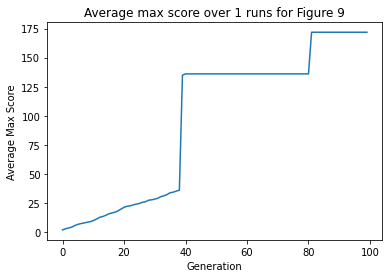

In [10]:
#fitness curves
x = []
y = []
average_maxes = np.zeros(numGens)
# average_maxes = np.zeros(100)

for i in range(len(gens)):
    for q in range(len(runs_score_track)):
        average_maxes[i] += runs_score_track[q]['maxes'][i]
    average_maxes[i] /= len(runs_score_track)
    
for gen in gens:
    x.append(gen)

plt.title(f'Average max score over {len(runs_score_track)} runs for {envName}')
plt.xlabel('Generation')
plt.ylabel('Average Max Score')
plt.plot(x, average_maxes)
plt.show()

## Reinforcement Learning + Victory Lap

In [11]:
print(run_winners)
for winner in run_winners[0]['winners']:
    for learner in winner.learners:
        print(learner.program.rule.region)
    print('\n\n\n')
# for learner in team.learners:
#     print(learner.program.rule.region)

[{'run': 0, 'winners': [<qtpg.team.Team object at 0x7fbb098bcfd0>, <qtpg.team.Team object at 0x7fbb0995c520>, <qtpg.team.Team object at 0x7fbb09922eb0>, <qtpg.team.Team object at 0x7fbb0993e460>]}]
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 1, 0, 3]
[1, 1, 5, 9]
[0, 4, 1, 1]
[1, 0, 0, 5]
[1, 0, 7, 9]
[0, 6, 0, 0]
[0, 6, 2, 5]
[1, 1, 0, 8]
[0, 9, 0, 4]
[0, 9, 6, 9]
[1, 5, 6, 9]
[0, 5, 0, 1]
[0, 5, 3, 7]
[1, 2, 6, 9]
[0, 5, 1, 7]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 6, 9]
[1, 5, 6, 9]
[0, 5, 0, 6]
[1, 7, 0, 8]
[0, 9, 0, 0]
[0, 9, 2, 9]
[1, 1, 0, 8]
[0, 9, 1, 9]
[1, 0, 0, 8]
[0, 9, 0, 4]
[0, 9, 6, 9]
[1, 5, 5, 7]
[1, 5, 9, 9]
[0, 8, 1, 5]
[1, 0, 0, 7]
[1, 0, 9, 9]
[0, 8, 0, 0]
[0, 8, 2, 5]
[1, 1, 0, 6]
[1, 1, 8, 9]
[0, 7, 0, 1]
[0, 7, 3, 5]
[1, 2, 5, 8]
[0, 9, 1, 9]
[1, 0, 0, 1]
[1, 0, 3, 9]
[0, 2, 1, 4]
[1, 0, 0, 4]
[1, 0, 6, 9]
[0, 5, 0, 6]
[1, 7, 1, 9]
[0, 0, 6, 8]
[1, 9, 0, 4]




[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 1, 0, 3]
[1, 1, 5, 9]
[0, 4, 1, 1]
[1, 0, 0, 5]
[1, 0, 7, 9]
[0, 6, 0, 0]
[0, 6, 2, 5]
[1, 1

In [12]:
for i in range(len(run_winners[0]['winners'])):
    for learner in run_winners[0]['winners'][i].learners:
        print(learner.id)
    print('\n')

5c29aa6e-524f-4f5d-bd42-54607408c27b
701f34b2-5986-44a9-8431-7f28caf6d35c
6eca5da4-6693-4627-a162-48b92bc56acb
569bd1ad-3cad-4bcc-8911-fef99d11b24e
a501e141-e6f6-4507-a034-70df4b5bef65
9643d9b3-83af-4c23-bd1d-7fadeed96f31
e22e696f-df6c-4634-b4a2-c36b51694363
6cab93aa-a3c8-4857-aefd-5d000b668dc7
c3613cf7-ba95-42f6-942e-8606e8d7d5c7
54651a5c-9260-4186-91cc-18ddaa783192
75786f3e-fa64-4f92-aacf-d5e8ebff851b
26cdd1b9-87c7-4788-a857-cedf104f3419
31416de1-5f87-455c-b40e-d2df9ca51a42
b283dfb6-306c-487a-86a2-5447a2e560f8
955c8d52-7de5-486c-93f9-860b7a660af0
d5444f6e-aeec-403c-abb4-b2f9af16ce19
061c4fc5-58ed-4365-98fc-299342293f7a
d80b8448-d8e3-42ad-9f24-242027d4ed4a
6f8cefbc-2c8b-42f8-80e1-f1bf377b4ba1
a03650cc-9585-48ae-8024-3600d21e3a99
a1279c14-61ff-4a4d-b17a-478dcb4dbb37
dcc71597-8e68-40c9-9cf8-b632d81c2cf8
d8e980bc-4513-4bf8-852f-c7ceb8290c8b
9309a69a-6ac7-4b35-a1f5-f617e677c480
239d2066-16c3-4e53-9e1b-803dec684845
9c23da3c-402a-4b00-b975-0af209c18eff
8a22c7ee-ac91-447c-83e6-dee1fb6b9780
b

In [13]:
# team = searchManager.winners[0]
team = run_winners[0]['winners'][0]
team.discount = 0.9
team.alpha = 0.5
# for learner in team.learners:
#     print(learner.program.rule.region)

# team.prune_single_cell_regions() # don't think this is good...
team.prune_duplicate_regions()

for i in range(env.rows):
#     print(f'Epoch: {i+1} --------')
    env.reset()
#     print(f'curr -> {env.current_state}')
    win = False
    selected_learner = team.select_learner(env, [0, 0, 0, 0])
    while not win:
        win, needs_update, reward, winning_action = team.q_evaluation(env, selected_learner)
#         print(reward)
#         print('hi')
        if not win:
            selected_learner = team.select_learner(env, selected_learner.program.rule.region)
            team.transition_update(reward, winning_action, needs_update, selected_learner)
            rl_query_env += 1

    team.final_update(reward, winning_action, needs_update)

print(win)
for learner in team.learners:
    print(f'{learner.program.rule.region}')
    for i in range(len(learner.program.rule.action_set)):
          print(f'{learner.program.rule.action_set[i]} --> {learner.program.rule.value_set[i]}')

PRUNING DUPLICATES!
52
52
regions --> [0, 0, 0, 0] is eligible with [0, 0, 2, 4]
[0, 0, 2, 4] --> [2, 3]
we chose --> [0, 0, 2, 4]
value set is 0, action selected --> 2
[0, 0, 2, 4]
[2, 3]
[0, 0]
2
(0, 4)
value set is 0, action selected --> 3
[0, 0, 2, 4]
[2, 3]
[0, 0]
3
(0, 3)
value set is 0, action selected --> 2
[0, 0, 2, 4]
[2, 3]
[0, 0]
2
(0, 4)
value set is 0, action selected --> 2
[0, 0, 2, 4]
[2, 3]
[0, 0]
2
(0, 4)
value set is 0, action selected --> 2
[0, 0, 2, 4]
[2, 3]
[0, 0]
2
(0, 4)
value set is 0, action selected --> 3
[0, 0, 2, 4]
[2, 3]
[0, 0]
3
(0, 3)
value set is 0, action selected --> 3
[0, 0, 2, 4]
[2, 3]
[0, 0]
3
(0, 2)
value set is 0, action selected --> 2
[0, 0, 2, 4]
[2, 3]
[0, 0]
2
(0, 3)
value set is 0, action selected --> 3
[0, 0, 2, 4]
[2, 3]
[0, 0]
3
(0, 2)
value set is 0, action selected --> 2
[0, 0, 2, 4]
[2, 3]
[0, 0]
2
(0, 3)
value set is 0, action selected --> 2
[0, 0, 2, 4]
[2, 3]
[0, 0]
2
(0, 4)
value set is 0, action selected --> 2
[0, 0, 2, 4]
[2, 

value set is 0, action selected --> 1
[1, 5, 6, 9]
[0, 1]
[0, 0]
1
(6, 5)
value set is 0, action selected --> 1
[1, 5, 6, 9]
[0, 1]
[0, 0]
1
(5, 5)
Winning action: 1
regions --> [1, 5, 6, 9] is eligible with [0, 5, 3, 7]
regions --> [1, 5, 6, 9] is eligible with [0, 5, 1, 7]
regions --> [1, 5, 6, 9] is eligible with [0, 5, 0, 6]
regions --> [1, 5, 6, 9] is eligible with [1, 5, 5, 7]
regions --> [1, 5, 6, 9] is eligible with [0, 5, 0, 6]
[0, 5, 3, 7] --> [2, 3]
[0, 5, 1, 7] --> [2, 3]
[0, 5, 0, 6] --> [2, 3]
[1, 5, 5, 7] --> [0, 1]
[0, 5, 0, 6] --> [2, 3]
we chose --> [0, 5, 3, 7]
value set is 0, action selected --> 3
[0, 5, 3, 7]
[2, 3]
[0, 0]
3
(5, 4)
value set is 0, action selected --> 3
[0, 5, 3, 7]
[2, 3]
[0, 0]
3
(5, 3)
value set is 0, action selected --> 2
[0, 5, 3, 7]
[2, 3]
[0, 0]
2
(5, 4)
value set is 0, action selected --> 3
[0, 5, 3, 7]
[2, 3]
[0, 0]
3
(5, 3)
value set is 0, action selected --> 3
[0, 5, 3, 7]
[2, 3]
[0, 0]
3
(5, 2)
Winning action: 3
regions --> [0, 5, 3, 7] 

[0, 0]
0
(4, 7)
value set is 0, action selected --> 1
[1, 7, 0, 8]
[0, 1]
[0, 0]
1
(3, 7)
value set is 0, action selected --> 1
[1, 7, 0, 8]
[0, 1]
[0, 0]
1
(2, 7)
value set is 0, action selected --> 0
[1, 7, 0, 8]
[0, 1]
[0, 0]
0
(3, 7)
value set is 0, action selected --> 0
[1, 7, 0, 8]
[0, 1]
[0, 0]
0
(4, 7)
value set is 0, action selected --> 1
[1, 7, 0, 8]
[0, 1]
[0, 0]
1
(3, 7)
value set is 0, action selected --> 0
[1, 7, 0, 8]
[0, 1]
[0, 0]
0
(4, 7)
value set is 0, action selected --> 1
[1, 7, 0, 8]
[0, 1]
[0, 0]
1
(3, 7)
value set is 0, action selected --> 0
[1, 7, 0, 8]
[0, 1]
[0, 0]
0
(4, 7)
value set is 0, action selected --> 1
[1, 7, 0, 8]
[0, 1]
[0, 0]
1
(3, 7)
value set is 0, action selected --> 1
[1, 7, 0, 8]
[0, 1]
[0, 0]
1
(2, 7)
value set is 0, action selected --> 0
[1, 7, 0, 8]
[0, 1]
[0, 0]
0
(3, 7)
value set is 0, action selected --> 0
[1, 7, 0, 8]
[0, 1]
[0, 0]
0
(4, 7)
value set is 0, action selected --> 0
[1, 7, 0, 8]
[0, 1]
[0, 0]
0
(5, 7)
value set is 0, action

(4, 1)
value set is 0, action selected --> 1
[1, 1, 0, 8]
[0, 1]
[0, 0]
1
(3, 1)
value set is 0, action selected --> 0
[1, 1, 0, 8]
[0, 1]
[0, 0]
0
(4, 1)
value set is 0, action selected --> 0
[1, 1, 0, 8]
[0, 1]
[0, 0]
0
(5, 1)
value set is 0, action selected --> 0
[1, 1, 0, 8]
[0, 1]
[0, 0]
0
(6, 1)
value set is 0, action selected --> 1
[1, 1, 0, 8]
[0, 1]
[0, 0]
1
(5, 1)
value set is 0, action selected --> 0
[1, 1, 0, 8]
[0, 1]
[0, 0]
0
(6, 1)
value set is 0, action selected --> 0
[1, 1, 0, 8]
[0, 1]
[0, 0]
0
(7, 1)
value set is 0, action selected --> 0
[1, 1, 0, 8]
[0, 1]
[0, 0]
0
(8, 1)
value set is 0, action selected --> 1
[1, 1, 0, 8]
[0, 1]
[0, 0]
1
(7, 1)
value set is 0, action selected --> 1
[1, 1, 0, 8]
[0, 1]
[0, 0]
1
(6, 1)
value set is 0, action selected --> 0
[1, 1, 0, 8]
[0, 1]
[0, 0]
0
(7, 1)
value set is 0, action selected --> 1
[1, 1, 0, 8]
[0, 1]
[0, 0]
1
(6, 1)
value set is 0, action selected --> 1
[1, 1, 0, 8]
[0, 1]
[0, 0]
1
(5, 1)
value set is 0, action selected

2
(9, 6)
value set is 0, action selected --> 3
[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 5)
value set is 0, action selected --> 3
[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 4)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 5)
value set is 0, action selected --> 3
[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 4)
value set is 0, action selected --> 3
[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 3)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 4)
value set is 0, action selected --> 3
[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 3)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 4)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 5)
value set is 0, action selected --> 3
[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 4)
value set is 0, action selected --> 3
[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 3)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 4)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 5)
value set is 0, action select

[0, 0]
2
(9, 6)
value set is 0, action selected --> 3
[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 5)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 6)
value set is 0, action selected --> 3
[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 5)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 6)
value set is 0, action selected --> 3
[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 5)
value set is 0, action selected --> 3
[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 4)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 5)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 6)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 7)
value set is 0, action selected --> 3
[0, 9, 1, 9]
[2, 3]
[0, 0]
3
(9, 6)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 7)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 8)
value set is 0, action selected --> 2
[0, 9, 1, 9]
[2, 3]
[0, 0]
2
(9, 9)
value set is 0, action

value set is 0, action selected --> 1
[1, 0, 3, 9]
[0, 1]
[0, 0]
1
(4, 0)
value set is 0, action selected --> 1
[1, 0, 3, 9]
[0, 1]
[0, 0]
1
(3, 0)
value set is 0, action selected --> 1
[1, 0, 3, 9]
[0, 1]
[0, 0]
1
(2, 0)
Winning action: 1
regions --> [1, 0, 3, 9] is eligible with [1, 0, 0, 5]
regions --> [1, 0, 3, 9] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 3, 9] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 3, 9] is eligible with [1, 0, 0, 7]
regions --> [1, 0, 3, 9] is eligible with [1, 0, 0, 4]
[1, 0, 0, 5] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 7] --> [0, 1]
[1, 0, 0, 4] --> [0, 1]
we chose --> [1, 0, 0, 5]
value set is 0, action selected --> 1
[1, 0, 0, 5]
[0, 1]
[0, 0]
1
(1, 0)
value set is 0, action selected --> 1
[1, 0, 0, 5]
[0, 1]
[0, 0]
1
(0, 0)
value set is 0, action selected --> 1
[1, 0, 0, 5]
[0, 1]
[0, 0]
1
(0, 0)
value set is 0, action selected --> 1
[1, 0, 0, 5]
[0, 1]
[0, 0]
1
(0, 0)
value set is 0, action selected --> 0
[1, 0

[0, 9, 0, 4] --> [2, 3]
[1, 0, 9, 9] --> [0, 1]
[1, 0, 3, 9] --> [0, 1]
[1, 0, 6, 9] --> [0, 1]
we chose --> [0, 9, 0, 0]
value set is 0, action selected --> 2
[0, 9, 0, 0]
[2, 3]
[0, 0]
2
(9, 1)
Winning action: 2
regions --> [0, 9, 0, 0] is eligible with [1, 1, 5, 9]
regions --> [0, 9, 0, 0] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 0, 0] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 0, 0] is eligible with [0, 9, 1, 9]
regions --> [0, 9, 0, 0] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 0, 0] is eligible with [1, 1, 8, 9]
regions --> [0, 9, 0, 0] is eligible with [0, 9, 1, 9]
[1, 1, 5, 9] --> [0, 1]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[1, 1, 8, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
we chose --> [0, 9, 0, 4]
[0, 9, 0, 4]
[2, 3]
[0.11262500000000002, 0]
2
(9, 2)
[0, 9, 0, 4]
[2, 3]
[0.11262500000000002, 0]
2
(9, 3)
[0, 9, 0, 4]
[2, 3]
[0.11262500000000002, 0]
2
(9, 4)
[0, 9, 0, 4]
[2, 3]
[0.11262500000000002, 0]


[0.11531250000000001, 0]
0
(3, 0)
[1, 0, 0, 7]
[0, 1]
[0.11531250000000001, 0]
0
(4, 0)
[1, 0, 0, 7]
[0, 1]
[0.11531250000000001, 0]
0
(5, 0)
[1, 0, 0, 7]
[0, 1]
[0.11531250000000001, 0]
0
(6, 0)
[1, 0, 0, 7]
[0, 1]
[0.11531250000000001, 0]
0
(7, 0)
[1, 0, 0, 7]
[0, 1]
[0.11531250000000001, 0]
0
(8, 0)
Winning action: 0
regions --> [1, 0, 0, 7] is eligible with [1, 0, 7, 9]
regions --> [1, 0, 0, 7] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 0, 7] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 0, 7] is eligible with [0, 8, 0, 0]
regions --> [1, 0, 0, 7] is eligible with [1, 0, 3, 9]
regions --> [1, 0, 0, 7] is eligible with [1, 0, 6, 9]
[1, 0, 7, 9] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[0, 8, 0, 0] --> [2, 3]
[1, 0, 3, 9] --> [0, 1]
[1, 0, 6, 9] --> [0, 1]
we chose --> [0, 8, 0, 0]
[0, 8, 0, 0]
[2, 3]
[0.0675, 0]
2
(8, 1)
Winning action: 2
regions --> [0, 8, 0, 0] is eligible with [1, 1, 5, 9]
regions --> [0, 8, 0, 0] is eligible with [1, 1, 0, 8]
regions -

[0, 0.10262500000000002]
3
(5, 5)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
3
(5, 4)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
2
(5, 5)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
2
(5, 6)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
3
(5, 5)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
2
(5, 6)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
3
(5, 5)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
2
(5, 6)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
3
(5, 5)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
3
(5, 4)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
3
(5, 3)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
3
(5, 2)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
3
(5, 1)
[0, 5, 1, 7]
[2, 3]
[0, 0.10262500000000002]
3
(5, 0)
Winning action: 3
regions --> [0, 5, 1, 7] is eligible with [1, 0, 0, 5]
regions --> [0, 5, 1, 7] is eligible with [0, 5, 0, 1]
regions --> [0, 5, 1, 7] is eligible with [1, 0, 0, 8]
regions --> [0, 5, 1, 7] is eligible with [0, 5, 0, 6]
regions --> [0, 5, 1, 7] i

[1, 7, 1, 9] --> [0, 1]
we chose --> [0, 5, 3, 7]
[0, 5, 3, 7]
[2, 3]
[0, 0.0925]
3
(5, 6)
[0, 5, 3, 7]
[2, 3]
[0, 0.0925]
3
(5, 5)
[0, 5, 3, 7]
[2, 3]
[0, 0.0925]
3
(5, 4)
[0, 5, 3, 7]
[2, 3]
[0, 0.0925]
3
(5, 3)
[0, 5, 3, 7]
[2, 3]
[0, 0.0925]
3
(5, 2)
Winning action: 3
regions --> [0, 5, 3, 7] is eligible with [0, 5, 1, 7]
regions --> [0, 5, 3, 7] is eligible with [0, 5, 0, 6]
regions --> [0, 5, 3, 7] is eligible with [1, 2, 5, 8]
regions --> [0, 5, 3, 7] is eligible with [0, 5, 0, 6]
[0, 5, 1, 7] --> [2, 3]
[0, 5, 0, 6] --> [2, 3]
[1, 2, 5, 8] --> [0, 1]
[0, 5, 0, 6] --> [2, 3]
we chose --> [0, 5, 0, 6]
[0, 5, 0, 6]
[2, 3]
[0.18709875000000004, 0]
2
(5, 3)
[0, 5, 0, 6]
[2, 3]
[0.18709875000000004, 0]
2
(5, 4)
[0, 5, 0, 6]
[2, 3]
[0.18709875000000004, 0]
2
(5, 5)
[0, 5, 0, 6]
[2, 3]
[0.18709875000000004, 0]
2
(5, 6)
[0, 5, 0, 6]
[2, 3]
[0.18709875000000004, 0]
2
(5, 7)
Winning action: 2
regions --> [0, 5, 0, 6] is eligible with [0, 5, 3, 7]
regions --> [0, 5, 0, 6] is eligible with 

[0, 5, 0, 6]
[2, 3]
[0.21496889062500005, 0]
2
(5, 1)
[0, 5, 0, 6]
[2, 3]
[0.21496889062500005, 0]
2
(5, 2)
[0, 5, 0, 6]
[2, 3]
[0.21496889062500005, 0]
2
(5, 3)
[0, 5, 0, 6]
[2, 3]
[0.21496889062500005, 0]
2
(5, 4)
[0, 5, 0, 6]
[2, 3]
[0.21496889062500005, 0]
2
(5, 5)
[0, 5, 0, 6]
[2, 3]
[0.21496889062500005, 0]
2
(5, 6)
[0, 5, 0, 6]
[2, 3]
[0.21496889062500005, 0]
2
(5, 7)
Winning action: 2
regions --> [0, 5, 0, 6] is eligible with [0, 5, 3, 7]
regions --> [0, 5, 0, 6] is eligible with [0, 5, 1, 7]
regions --> [0, 5, 0, 6] is eligible with [1, 7, 0, 8]
regions --> [0, 5, 0, 6] is eligible with [1, 7, 1, 9]
[0, 5, 3, 7] --> [2, 3]
[0, 5, 1, 7] --> [2, 3]
[1, 7, 0, 8] --> [0, 1]
[1, 7, 1, 9] --> [0, 1]
we chose --> [0, 5, 1, 7]
[0, 5, 1, 7]
[2, 3]
[0, 0.24078303203125007]
3
(5, 6)
[0, 5, 1, 7]
[2, 3]
[0, 0.24078303203125007]
3
(5, 5)
[0, 5, 1, 7]
[2, 3]
[0, 0.24078303203125007]
3
(5, 4)
[0, 5, 1, 7]
[2, 3]
[0, 0.24078303203125007]
3
(5, 3)
[0, 5, 1, 7]
[2, 3]
[0, 0.24078303203125007]
3

[0, 0.11000000000000001]
1
(2, 7)
[1, 7, 1, 9]
[0, 1]
[0, 0.11000000000000001]
1
(1, 7)
[1, 7, 1, 9]
[0, 1]
[0, 0.11000000000000001]
1
(0, 7)
Winning action: 1
regions --> [1, 7, 1, 9] is eligible with [1, 7, 0, 8]
regions --> [1, 7, 1, 9] is eligible with [0, 0, 6, 8]
[1, 7, 0, 8] --> [0, 1]
[0, 0, 6, 8] --> [2, 3]
we chose --> [1, 7, 0, 8]
[1, 7, 0, 8]
[0, 1]
[0.16591875, 0]
0
(1, 7)
[1, 7, 0, 8]
[0, 1]
[0.16591875, 0]
0
(2, 7)
[1, 7, 0, 8]
[0, 1]
[0.16591875, 0]
0
(3, 7)
[1, 7, 0, 8]
[0, 1]
[0.16591875, 0]
0
(4, 7)
[1, 7, 0, 8]
[0, 1]
[0.16591875, 0]
0
(5, 7)
[1, 7, 0, 8]
[0, 1]
[0.16591875, 0]
0
(6, 7)
[1, 7, 0, 8]
[0, 1]
[0.16591875, 0]
1
(5, 7)
[1, 7, 0, 8]
[0, 1]
[0.16591875, 0]
0
(6, 7)
[1, 7, 0, 8]
[0, 1]
[0.16591875, 0]
0
(7, 7)
[1, 7, 0, 8]
[0, 1]
[0.16591875, 0]
0
(8, 7)
[1, 7, 0, 8]
[0, 1]
[0.16591875, 0]
0
(9, 7)
Winning action: 0
regions --> [1, 7, 0, 8] is eligible with [0, 9, 6, 9]
regions --> [1, 7, 0, 8] is eligible with [0, 9, 6, 9]
regions --> [1, 7, 0, 8] is eligi

[0, 1]
[0, 0.20187666791503908]
1
(8, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.20187666791503908]
1
(7, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.20187666791503908]
0
(8, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.20187666791503908]
1
(7, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.20187666791503908]
1
(6, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.20187666791503908]
1
(5, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.20187666791503908]
1
(4, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.20187666791503908]
1
(3, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.20187666791503908]
1
(2, 0)
Winning action: 1
regions --> [1, 0, 3, 9] is eligible with [1, 0, 0, 5]
regions --> [1, 0, 3, 9] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 3, 9] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 3, 9] is eligible with [1, 0, 0, 7]
regions --> [1, 0, 3, 9] is eligible with [1, 0, 0, 4]
[1, 0, 0, 5] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 7] --> [0, 1]
[1, 0, 0, 4] --> [0, 1]
we chose --> [1, 0, 0, 7]
[1, 0, 0, 7]
[0, 1]
[0.21422556206103519, 0]
0
(3, 0)
[1, 0, 0, 7]
[0, 1]
[0.21422556206

[2, 3]
[0, 0.20727005169433596]
3
(9, 4)
[0, 9, 1, 9]
[2, 3]
[0, 0.20727005169433596]
2
(9, 5)
[0, 9, 1, 9]
[2, 3]
[0, 0.20727005169433596]
3
(9, 4)
[0, 9, 1, 9]
[2, 3]
[0, 0.20727005169433596]
3
(9, 3)
[0, 9, 1, 9]
[2, 3]
[0, 0.20727005169433596]
3
(9, 2)
[0, 9, 1, 9]
[2, 3]
[0, 0.20727005169433596]
3
(9, 1)
[0, 9, 1, 9]
[2, 3]
[0, 0.20727005169433596]
3
(9, 0)
Winning action: 3
regions --> [0, 9, 1, 9] is eligible with [1, 0, 7, 9]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 0]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 9, 9]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 3, 9]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 6, 9]
[1, 0, 7, 9] --> [0, 1]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 0, 0] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[1, 0, 9, 9] --> [0, 1]
[1, 0, 3, 9] --> [0, 1]
[1, 0, 6,

[2, 3]
[0.2064094237744141, 0]
3
(9, 3)
[0, 9, 0, 4]
[2, 3]
[0.2064094237744141, 0]
2
(9, 4)
[0, 9, 0, 4]
[2, 3]
[0.2064094237744141, 0]
2
(9, 5)
Winning action: 2
regions --> [0, 9, 0, 4] is eligible with [1, 5, 6, 9]
regions --> [0, 9, 0, 4] is eligible with [1, 5, 6, 9]
regions --> [0, 9, 0, 4] is eligible with [0, 9, 2, 9]
regions --> [0, 9, 0, 4] is eligible with [0, 9, 1, 9]
regions --> [0, 9, 0, 4] is eligible with [1, 5, 9, 9]
regions --> [0, 9, 0, 4] is eligible with [0, 9, 1, 9]
[1, 5, 6, 9] --> [0, 1]
[1, 5, 6, 9] --> [0, 1]
[0, 9, 2, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[1, 5, 9, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
we chose --> [1, 5, 6, 9]
[1, 5, 6, 9]
[0, 1]
[0, 0.16503471875000003]
1
(8, 5)
[1, 5, 6, 9]
[0, 1]
[0, 0.16503471875000003]
1
(7, 5)
[1, 5, 6, 9]
[0, 1]
[0, 0.16503471875000003]
1
(6, 5)
[1, 5, 6, 9]
[0, 1]
[0, 0.16503471875000003]
1
(5, 5)
Winning action: 1
regions --> [1, 5, 6, 9] is eligible with [0, 5, 3, 7]
regions --> [1, 5, 6, 9] is eligible with [0, 5

[0, 6, 0, 0] --> [2, 3]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 7] --> [0, 1]
[1, 0, 3, 9] --> [0, 1]
[1, 0, 6, 9] --> [0, 1]
we chose --> [1, 0, 0, 8]
[1, 0, 0, 8]
[0, 1]
[0.2923888756250168, 0]
0
(7, 0)
[1, 0, 0, 8]
[0, 1]
[0.2923888756250168, 0]
0
(8, 0)
[1, 0, 0, 8]
[0, 1]
[0.2923888756250168, 0]
0
(9, 0)
Winning action: 0
regions --> [1, 0, 0, 8] is eligible with [1, 0, 7, 9]
regions --> [1, 0, 0, 8] is eligible with [0, 9, 0, 4]
regions --> [1, 0, 0, 8] is eligible with [0, 9, 0, 4]
regions --> [1, 0, 0, 8] is eligible with [0, 9, 0, 0]
regions --> [1, 0, 0, 8] is eligible with [0, 9, 0, 4]
regions --> [1, 0, 0, 8] is eligible with [1, 0, 9, 9]
regions --> [1, 0, 0, 8] is eligible with [1, 0, 3, 9]
regions --> [1, 0, 0, 8] is eligible with [1, 0, 6, 9]
[1, 0, 7, 9] --> [0, 1]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 0, 0] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[1, 0, 9, 9] --> [0, 1]
[1, 0, 3, 9] --> [0, 1]
[1, 0, 6, 9] --> [0, 1]
we chose --> [1, 0, 6

[0, 9, 1, 9] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[1, 1, 8, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
we chose --> [0, 9, 0, 4]
[0, 9, 0, 4]
[2, 3]
[0.22247033532470706, 0]
2
(9, 2)
[0, 9, 0, 4]
[2, 3]
[0.22247033532470706, 0]
2
(9, 3)
[0, 9, 0, 4]
[2, 3]
[0.22247033532470706, 0]
2
(9, 4)
[0, 9, 0, 4]
[2, 3]
[0.22247033532470706, 0]
2
(9, 5)
Winning action: 2
regions --> [0, 9, 0, 4] is eligible with [1, 5, 6, 9]
regions --> [0, 9, 0, 4] is eligible with [1, 5, 6, 9]
regions --> [0, 9, 0, 4] is eligible with [0, 9, 2, 9]
regions --> [0, 9, 0, 4] is eligible with [0, 9, 1, 9]
regions --> [0, 9, 0, 4] is eligible with [1, 5, 9, 9]
regions --> [0, 9, 0, 4] is eligible with [0, 9, 1, 9]
[1, 5, 6, 9] --> [0, 1]
[1, 5, 6, 9] --> [0, 1]
[0, 9, 2, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[1, 5, 9, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
we chose --> [1, 5, 6, 9]
[1, 5, 6, 9]
[0, 1]
[0, 0.22254604632469482]
1
(8, 5)
[1, 5, 6, 9]
[0, 1]
[0, 0.22254604632469482]
1
(7, 5)
[1, 5, 6, 9]
[0, 1]
[0, 0.2225460463

[1, 0, 0, 7]
[0, 1]
[0.29393795332956707, 0]
0
(8, 0)
Winning action: 0
regions --> [1, 0, 0, 7] is eligible with [1, 0, 7, 9]
regions --> [1, 0, 0, 7] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 0, 7] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 0, 7] is eligible with [0, 8, 0, 0]
regions --> [1, 0, 0, 7] is eligible with [1, 0, 3, 9]
regions --> [1, 0, 0, 7] is eligible with [1, 0, 6, 9]
[1, 0, 7, 9] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[0, 8, 0, 0] --> [2, 3]
[1, 0, 3, 9] --> [0, 1]
[1, 0, 6, 9] --> [0, 1]
we chose --> [1, 0, 3, 9]
[1, 0, 3, 9]
[0, 1]
[0, 0.3200921024913964]
1
(7, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.3200921024913964]
1
(6, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.3200921024913964]
1
(5, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.3200921024913964]
1
(4, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.3200921024913964]
1
(3, 0)
[1, 0, 3, 9]
[0, 1]
[0, 0.3200921024913964]
1
(2, 0)
Winning action: 1
regions --> [1, 0, 3, 9] is eligible with [1, 0, 0, 5]
regions --> [1, 0, 3, 9] is eligible 

[0.3066606952370332, 0]
0
(6, 1)
[1, 1, 0, 8]
[0, 1]
[0.3066606952370332, 0]
0
(7, 1)
[1, 1, 0, 8]
[0, 1]
[0.3066606952370332, 0]
0
(8, 1)
[1, 1, 0, 8]
[0, 1]
[0.3066606952370332, 0]
0
(9, 1)
Winning action: 0
regions --> [1, 1, 0, 8] is eligible with [1, 1, 5, 9]
regions --> [1, 1, 0, 8] is eligible with [0, 9, 0, 4]
regions --> [1, 1, 0, 8] is eligible with [0, 9, 0, 4]
regions --> [1, 1, 0, 8] is eligible with [0, 9, 1, 9]
regions --> [1, 1, 0, 8] is eligible with [0, 9, 0, 4]
regions --> [1, 1, 0, 8] is eligible with [1, 1, 8, 9]
regions --> [1, 1, 0, 8] is eligible with [0, 9, 1, 9]
[1, 1, 5, 9] --> [0, 1]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[1, 1, 8, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
we chose --> [1, 1, 8, 9]
[1, 1, 8, 9]
[0, 1]
[0, 0.26878633060104185]
1
(8, 1)
[1, 1, 8, 9]
[0, 1]
[0, 0.26878633060104185]
1
(7, 1)
Winning action: 1
regions --> [1, 1, 8, 9] is eligible with [1, 1, 5, 9]
regions --> [1, 1, 8, 9] is el

[0, 1]
[96.971875, 0]
0
(1, 9)
[1, 9, 0, 4]
[0, 1]
[96.971875, 0]
0
(2, 9)
[1, 9, 0, 4]
[0, 1]
[96.971875, 0]
0
(3, 9)
[1, 9, 0, 4]
[0, 1]
[96.971875, 0]
0
(4, 9)
Winning action: 0
win!
regions --> [0, 0, 0, 0] is eligible with [0, 0, 2, 4]
[0, 0, 2, 4] --> [2, 3]
we chose --> [0, 0, 2, 4]
[0, 0, 2, 4]
[2, 3]
[0, 0.3112629401241963]
3
(0, 2)
[0, 0, 2, 4]
[2, 3]
[0, 0.3112629401241963]
3
(0, 1)
Winning action: 3
regions --> [0, 0, 2, 4] is eligible with [1, 1, 0, 3]
regions --> [0, 0, 2, 4] is eligible with [1, 1, 0, 8]
regions --> [0, 0, 2, 4] is eligible with [1, 1, 0, 8]
regions --> [0, 0, 2, 4] is eligible with [1, 1, 0, 6]
[1, 1, 0, 3] --> [0, 1]
[1, 1, 0, 8] --> [0, 1]
[1, 1, 0, 8] --> [0, 1]
[1, 1, 0, 6] --> [0, 1]
we chose --> [1, 1, 0, 8]
[1, 1, 0, 8]
[0, 1]
[0.34205163738209954, 0]
0
(1, 1)
[1, 1, 0, 8]
[0, 1]
[0.34205163738209954, 0]
0
(2, 1)
[1, 1, 0, 8]
[0, 1]
[0.34205163738209954, 0]
0
(3, 1)
[1, 1, 0, 8]
[0, 1]
[0.34205163738209954, 0]
0
(4, 1)
[1, 1, 0, 8]
[0, 1]
[0.3420

regions --> [1, 0, 6, 9] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 6, 9] is eligible with [1, 0, 0, 7]
regions --> [1, 0, 6, 9] is eligible with [1, 0, 3, 9]
regions --> [1, 0, 6, 9] is eligible with [0, 5, 0, 6]
[1, 0, 0, 5] --> [0, 1]
[0, 5, 0, 1] --> [2, 3]
[1, 0, 0, 8] --> [0, 1]
[0, 5, 0, 6] --> [2, 3]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 7] --> [0, 1]
[1, 0, 3, 9] --> [0, 1]
[0, 5, 0, 6] --> [2, 3]
we chose --> [1, 0, 0, 5]
[1, 0, 0, 5]
[0, 1]
[0.3017032229858184, 0]
0
(6, 0)
Winning action: 0
regions --> [1, 0, 0, 5] is eligible with [0, 6, 0, 0]
regions --> [1, 0, 0, 5] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 0, 5] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 0, 5] is eligible with [1, 0, 0, 7]
regions --> [1, 0, 0, 5] is eligible with [1, 0, 3, 9]
regions --> [1, 0, 0, 5] is eligible with [1, 0, 6, 9]
[0, 6, 0, 0] --> [2, 3]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 7] --> [0, 1]
[1, 0, 3, 9] --> [0, 1]
[1, 0, 6, 9] --> [0, 1]
we chose --> [1, 

Winning action: 1
regions --> [1, 5, 6, 9] is eligible with [0, 5, 3, 7]
regions --> [1, 5, 6, 9] is eligible with [0, 5, 1, 7]
regions --> [1, 5, 6, 9] is eligible with [0, 5, 0, 6]
regions --> [1, 5, 6, 9] is eligible with [1, 5, 5, 7]
regions --> [1, 5, 6, 9] is eligible with [0, 5, 0, 6]
[0, 5, 3, 7] --> [2, 3]
[0, 5, 1, 7] --> [2, 3]
[0, 5, 0, 6] --> [2, 3]
[1, 5, 5, 7] --> [0, 1]
[0, 5, 0, 6] --> [2, 3]
we chose --> [0, 5, 1, 7]
[0, 5, 1, 7]
[2, 3]
[0, 0.626782968821917]
3
(5, 4)
[0, 5, 1, 7]
[2, 3]
[0, 0.626782968821917]
3
(5, 3)
[0, 5, 1, 7]
[2, 3]
[0, 0.626782968821917]
3
(5, 2)
[0, 5, 1, 7]
[2, 3]
[0, 0.626782968821917]
3
(5, 1)
[0, 5, 1, 7]
[2, 3]
[0, 0.626782968821917]
3
(5, 0)
Winning action: 3
regions --> [0, 5, 1, 7] is eligible with [1, 0, 0, 5]
regions --> [0, 5, 1, 7] is eligible with [0, 5, 0, 1]
regions --> [0, 5, 1, 7] is eligible with [1, 0, 0, 8]
regions --> [0, 5, 1, 7] is eligible with [0, 5, 0, 6]
regions --> [0, 5, 1, 7] is eligible with [1, 0, 0, 8]
regions 

3
(9, 4)
[0, 9, 2, 9]
[2, 3]
[0, 0.39308327806343224]
3
(9, 3)
[0, 9, 2, 9]
[2, 3]
[0, 0.39308327806343224]
3
(9, 2)
[0, 9, 2, 9]
[2, 3]
[0, 0.39308327806343224]
3
(9, 1)
Winning action: 3
regions --> [0, 9, 2, 9] is eligible with [1, 1, 5, 9]
regions --> [0, 9, 2, 9] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 2, 9] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 2, 9] is eligible with [0, 9, 1, 9]
regions --> [0, 9, 2, 9] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 2, 9] is eligible with [1, 1, 8, 9]
regions --> [0, 9, 2, 9] is eligible with [0, 9, 1, 9]
[1, 1, 5, 9] --> [0, 1]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[1, 1, 8, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
we chose --> [0, 9, 0, 4]
[0, 9, 0, 4]
[2, 3]
[0.3893916102680224, 0]
2
(9, 2)
[0, 9, 0, 4]
[2, 3]
[0.3893916102680224, 0]
2
(9, 3)
[0, 9, 0, 4]
[2, 3]
[0.3893916102680224, 0]
2
(9, 4)
[0, 9, 0, 4]
[2, 3]
[0.3893916102680224, 0]
2
(9, 5)
Winning action: 2
re

(9, 4)
[0, 9, 0, 4]
[2, 3]
[0.3834840598557687, 0]
3
(9, 3)
[0, 9, 0, 4]
[2, 3]
[0.3834840598557687, 0]
2
(9, 4)
[0, 9, 0, 4]
[2, 3]
[0.3834840598557687, 0]
2
(9, 5)
Winning action: 2
regions --> [0, 9, 0, 4] is eligible with [1, 5, 6, 9]
regions --> [0, 9, 0, 4] is eligible with [1, 5, 6, 9]
regions --> [0, 9, 0, 4] is eligible with [0, 9, 2, 9]
regions --> [0, 9, 0, 4] is eligible with [0, 9, 1, 9]
regions --> [0, 9, 0, 4] is eligible with [1, 5, 9, 9]
regions --> [0, 9, 0, 4] is eligible with [0, 9, 1, 9]
[1, 5, 6, 9] --> [0, 1]
[1, 5, 6, 9] --> [0, 1]
[0, 9, 2, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[1, 5, 9, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
we chose --> [1, 5, 9, 9]
[1, 5, 9, 9]
[0, 1]
[0, 0.5787272059936094]
1
(8, 5)
Winning action: 1
regions --> [1, 5, 9, 9] is eligible with [1, 5, 6, 9]
regions --> [1, 5, 9, 9] is eligible with [1, 5, 6, 9]
regions --> [1, 5, 9, 9] is eligible with [0, 8, 1, 5]
regions --> [1, 5, 9, 9] is eligible with [0, 8, 2, 5]
[1, 5, 6, 9] --> [0, 1]
[

[0, 0.39841874932724286]
1
(7, 0)
[1, 0, 6, 9]
[0, 1]
[0, 0.39841874932724286]
1
(6, 0)
[1, 0, 6, 9]
[0, 1]
[0, 0.39841874932724286]
1
(5, 0)
Winning action: 1
regions --> [1, 0, 6, 9] is eligible with [1, 0, 0, 5]
regions --> [1, 0, 6, 9] is eligible with [0, 5, 0, 1]
regions --> [1, 0, 6, 9] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 6, 9] is eligible with [0, 5, 0, 6]
regions --> [1, 0, 6, 9] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 6, 9] is eligible with [1, 0, 0, 7]
regions --> [1, 0, 6, 9] is eligible with [1, 0, 3, 9]
regions --> [1, 0, 6, 9] is eligible with [0, 5, 0, 6]
[1, 0, 0, 5] --> [0, 1]
[0, 5, 0, 1] --> [2, 3]
[1, 0, 0, 8] --> [0, 1]
[0, 5, 0, 6] --> [2, 3]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 7] --> [0, 1]
[1, 0, 3, 9] --> [0, 1]
[0, 5, 0, 6] --> [2, 3]
we chose --> [1, 0, 0, 8]
[1, 0, 0, 8]
[0, 1]
[0.5011243776140286, 0]
1
(4, 0)
[1, 0, 0, 8]
[0, 1]
[0.5011243776140286, 0]
0
(5, 0)
[1, 0, 0, 8]
[0, 1]
[0.5011243776140286, 0]
0
(6, 0)
[1, 0, 0, 8]
[0, 1]
[0.

[0, 9, 1, 9]
[2, 3]
[0, 0.414567248362643]
3
(9, 0)
Winning action: 3
regions --> [0, 9, 1, 9] is eligible with [1, 0, 7, 9]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 0]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 9, 9]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 3, 9]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 6, 9]
[1, 0, 7, 9] --> [0, 1]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 0, 0] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[1, 0, 9, 9] --> [0, 1]
[1, 0, 3, 9] --> [0, 1]
[1, 0, 6, 9] --> [0, 1]
we chose --> [1, 0, 6, 9]
[1, 0, 6, 9]
[0, 1]
[0, 0.4697153445899343]
1
(8, 0)
[1, 0, 6, 9]
[0, 1]
[0, 0.4697153445899343]
1
(7, 0)
[1, 0, 6, 9]
[0, 1]
[0, 0.4697153445899343]
1
(6, 0)
[1, 0, 6, 9]
[0, 1]
[0, 0.4697153445899343]
1
(5, 0)
Winning action: 1
regions --> [1, 0, 6, 9] is eligible with 

(8, 0)
Winning action: 0
regions --> [1, 0, 0, 7] is eligible with [1, 0, 7, 9]
regions --> [1, 0, 0, 7] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 0, 7] is eligible with [1, 0, 0, 8]
regions --> [1, 0, 0, 7] is eligible with [0, 8, 0, 0]
regions --> [1, 0, 0, 7] is eligible with [1, 0, 3, 9]
regions --> [1, 0, 0, 7] is eligible with [1, 0, 6, 9]
[1, 0, 7, 9] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[0, 8, 0, 0] --> [2, 3]
[1, 0, 3, 9] --> [0, 1]
[1, 0, 6, 9] --> [0, 1]
we chose --> [0, 8, 0, 0]
[0, 8, 0, 0]
[2, 3]
[0.3601727302137028, 0]
2
(8, 1)
Winning action: 2
regions --> [0, 8, 0, 0] is eligible with [1, 1, 5, 9]
regions --> [0, 8, 0, 0] is eligible with [1, 1, 0, 8]
regions --> [0, 8, 0, 0] is eligible with [1, 1, 0, 8]
regions --> [0, 8, 0, 0] is eligible with [0, 8, 1, 5]
regions --> [0, 8, 0, 0] is eligible with [1, 1, 8, 9]
[1, 1, 5, 9] --> [0, 1]
[1, 1, 0, 8] --> [0, 1]
[1, 1, 0, 8] --> [0, 1]
[0, 8, 1, 5] --> [2, 3]
[1, 1, 8, 9] --> [0, 1]
we chose 

regions --> [0, 0, 0, 0] is eligible with [0, 0, 2, 4]
[0, 0, 2, 4] --> [2, 3]
we chose --> [0, 0, 2, 4]
[0, 0, 2, 4]
[2, 3]
[0, 0.39009490304356265]
3
(0, 2)
[0, 0, 2, 4]
[2, 3]
[0, 0.39009490304356265]
3
(0, 1)
Winning action: 3
regions --> [0, 0, 2, 4] is eligible with [1, 1, 0, 3]
regions --> [0, 0, 2, 4] is eligible with [1, 1, 0, 8]
regions --> [0, 0, 2, 4] is eligible with [1, 1, 0, 8]
regions --> [0, 0, 2, 4] is eligible with [1, 1, 0, 6]
[1, 1, 0, 3] --> [0, 1]
[1, 1, 0, 8] --> [0, 1]
[1, 1, 0, 8] --> [0, 1]
[1, 1, 0, 6] --> [0, 1]
we chose --> [1, 1, 0, 3]
[1, 1, 0, 3]
[0, 1]
[0.13697627175781252, 0]
0
(1, 1)
[1, 1, 0, 3]
[0, 1]
[0.13697627175781252, 0]
0
(2, 1)
[1, 1, 0, 3]
[0, 1]
[0.13697627175781252, 0]
0
(3, 1)
[1, 1, 0, 3]
[0, 1]
[0.13697627175781252, 0]
0
(4, 1)
Winning action: 0
regions --> [1, 1, 0, 3] is eligible with [0, 4, 1, 1]
regions --> [1, 1, 0, 3] is eligible with [1, 1, 0, 8]
regions --> [1, 1, 0, 3] is eligible with [1, 1, 0, 8]
regions --> [1, 1, 0, 3] is 

regions --> [0, 5, 0, 6] is eligible with [0, 5, 1, 7]
regions --> [0, 5, 0, 6] is eligible with [1, 7, 0, 8]
regions --> [0, 5, 0, 6] is eligible with [1, 7, 1, 9]
[0, 5, 3, 7] --> [2, 3]
[0, 5, 1, 7] --> [2, 3]
[1, 7, 0, 8] --> [0, 1]
[1, 7, 1, 9] --> [0, 1]
we chose --> [1, 7, 0, 8]
[1, 7, 0, 8]
[0, 1]
[14.551064023015357, 0]
0
(6, 7)
[1, 7, 0, 8]
[0, 1]
[14.551064023015357, 0]
0
(7, 7)
[1, 7, 0, 8]
[0, 1]
[14.551064023015357, 0]
0
(8, 7)
[1, 7, 0, 8]
[0, 1]
[14.551064023015357, 0]
0
(9, 7)
Winning action: 0
regions --> [1, 7, 0, 8] is eligible with [0, 9, 6, 9]
regions --> [1, 7, 0, 8] is eligible with [0, 9, 6, 9]
regions --> [1, 7, 0, 8] is eligible with [0, 9, 2, 9]
regions --> [1, 7, 0, 8] is eligible with [0, 9, 1, 9]
regions --> [1, 7, 0, 8] is eligible with [0, 9, 6, 9]
regions --> [1, 7, 0, 8] is eligible with [0, 9, 1, 9]
regions --> [1, 7, 0, 8] is eligible with [1, 7, 1, 9]
[0, 9, 6, 9] --> [2, 3]
[0, 9, 6, 9] --> [2, 3]
[0, 9, 2, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0

[0, 9, 1, 9] --> [2, 3]
[1, 5, 9, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
we chose --> [0, 9, 1, 9]
[0, 9, 1, 9]
[2, 3]
[0, 0.8912704095459671]
3
(9, 4)
[0, 9, 1, 9]
[2, 3]
[0, 0.8912704095459671]
3
(9, 3)
[0, 9, 1, 9]
[2, 3]
[0, 0.8912704095459671]
3
(9, 2)
[0, 9, 1, 9]
[2, 3]
[0, 0.8912704095459671]
3
(9, 1)
[0, 9, 1, 9]
[2, 3]
[0, 0.8912704095459671]
3
(9, 0)
Winning action: 3
regions --> [0, 9, 1, 9] is eligible with [1, 0, 7, 9]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 0]
regions --> [0, 9, 1, 9] is eligible with [0, 9, 0, 4]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 9, 9]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 3, 9]
regions --> [0, 9, 1, 9] is eligible with [1, 0, 6, 9]
[1, 0, 7, 9] --> [0, 1]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[0, 9, 0, 0] --> [2, 3]
[0, 9, 0, 4] --> [2, 3]
[1, 0, 9, 9] --> [0, 1]
[1, 0, 3, 9] --> [0, 1]
[1, 0, 6, 9

[0, 1]
[4.458422941938452, 0]
0
(5, 7)
[1, 7, 0, 8]
[0, 1]
[4.458422941938452, 0]
0
(6, 7)
[1, 7, 0, 8]
[0, 1]
[4.458422941938452, 0]
0
(7, 7)
[1, 7, 0, 8]
[0, 1]
[4.458422941938452, 0]
0
(8, 7)
[1, 7, 0, 8]
[0, 1]
[4.458422941938452, 0]
0
(9, 7)
Winning action: 0
regions --> [1, 7, 0, 8] is eligible with [0, 9, 6, 9]
regions --> [1, 7, 0, 8] is eligible with [0, 9, 6, 9]
regions --> [1, 7, 0, 8] is eligible with [0, 9, 2, 9]
regions --> [1, 7, 0, 8] is eligible with [0, 9, 1, 9]
regions --> [1, 7, 0, 8] is eligible with [0, 9, 6, 9]
regions --> [1, 7, 0, 8] is eligible with [0, 9, 1, 9]
regions --> [1, 7, 0, 8] is eligible with [1, 7, 1, 9]
[0, 9, 6, 9] --> [2, 3]
[0, 9, 6, 9] --> [2, 3]
[0, 9, 2, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 6, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[1, 7, 1, 9] --> [0, 1]
we chose --> [1, 7, 1, 9]
[1, 7, 1, 9]
[0, 1]
[0, 35.14890413151129]
1
(8, 7)
[1, 7, 1, 9]
[0, 1]
[0, 35.14890413151129]
0
(9, 7)
[1, 7, 1, 9]
[0, 1]
[0, 35.14890413151129]
1
(8, 7)


## State Action Map (RL)

→ → → → → ↓ ← ↓ ← ← 

↓ ← ← ← ← ↓ X ↓ ? ? 

↓ ↑ ↑ ← ← ↓ X ↓ ? ? 

↓ ↑ ↑ ← ← ↓ X ↓ ? ? 

→ → → → → → → ↓ X X 

↑ ← X X X X ? ↓ X ↑ 

↑ ↑ ? ? ? X ? ↓ X ↑ 

↑ ↑ ← ← ← X ? ↓ ? ↑ 

↑ ↑ ? ? ? X ? ↓ ? ↑ 

↑ ↑ ← ← ← X → → → ↑ 



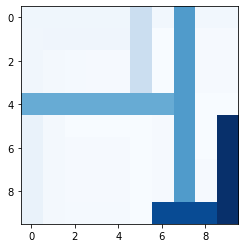

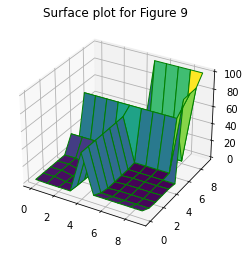

In [14]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

region_action_scores = []
for learner in team.learners:
    if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
    else:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)
# print(sorted_region_action_scores)
# for record in sorted_region_action_scores:
#     print(record)
action_states = []
for record in sorted_region_action_scores:
    action = ''
    if record['action'] == 0:
        action = '\u2191'
    elif record['action'] == 1:
        action = '\u2193'
    elif record['action'] == 2:
        action = '\u2192'
    elif record['action'] == 3:
        action = '\u2190'

    for i in range(record['region'][3] - record['region'][2]+1):
        state = [0, 0]
        state[record['region'][0]] = record['region'][1]
        state[not record['region'][0]] = record['region'][2] + i
        
        # ensure we do not enter duplicate states
        found = 0
        for pair in action_states:
            if pair['state'] == (state[0], state[1]):
                found = 1
                
        if found == 0:
            action_states.append({'state': (state[0], state[1]), 'action': action, 'q': record['q'] })

# add in the rest of the states, either they are not visited, or illegal
for n in reversed(range(env.rows)):
    for m in range(env.cols):
        action = ''
        found = 0
        for record in action_states:
            if record['state'] == (n, m):
                found = 1
                action = record['action']
#                 action = float(round(record['q'], 0))
        if found == 0:
            if not env.check_legal((n, m)):
                action = 'X'
            else:
                action = '?'
        print(f'{action} ', end='')
    print('\n')
    

q_map = np.zeros((env.rows, env.cols))

# add in the rest of the states, either they are not visited, or illegal
for n in range(env.rows):
    for m in range(env.cols):
        action = ''
        found = 0
        for record in action_states:
            if record['state'] == (n, m):
                found = 1
                action = record['q']
        if found == 0:
            if not env.check_legal((n, m)):
                action = -1
            else:
                action = 0
        q_map[(env.rows-1)-n][m] = action

plt.imshow(q_map, cmap='Blues', interpolation='nearest')
plt.show()

x = []
y = []
for i in range(env.cols):
    x.append(i)
    y.append(i)

Y, X = np.meshgrid(x, y)

fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection ='3d')

# syntax for plotting
ax.plot_surface(X, Y, q_map, cmap ='viridis', edgecolor ='green')
ax.set_title(f'Surface plot for {envName}')
plt.show()

## Heatmap (RL)

In [15]:
region_action_scores = []
for learner in team.learners:
    if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
    else:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)

state_counts = []

for n in reversed(range(env.rows)):
    for m in range(env.cols):
        state_count = 0
        for record in sorted_region_action_scores:
            for i in range(record['region'][3] - record['region'][2]+1):
                state = [0, 0]
                state[record['region'][0]] = record['region'][1]
                state[not record['region'][0]] = record['region'][2] + i

                if state == [n, m]:
                    state_count += 1
                # state count logic goes here
        state_counts.append({'state': (n, m), 'count': state_count})

for n in reversed(range(env.rows)):
    for m in range(env.cols):
        for record in state_counts:
            if (n, m) == record['state']:
                count = record['count']
                print(f'{count} ', end='')
    print('')

8 7 7 6 6 6 6 7 6 6 
6 5 4 2 2 4 0 2 0 0 
7 4 2 1 1 4 0 2 0 0 
6 4 3 1 1 4 0 2 0 0 
8 8 4 4 4 5 4 4 0 0 
6 4 0 0 0 0 0 2 0 1 
6 4 0 0 0 0 0 2 0 1 
5 5 1 1 1 0 0 2 0 1 
6 4 0 0 0 0 0 2 0 1 
7 4 1 1 1 0 1 2 1 1 


In [16]:
# print(team.gp_query_env)
print(gp_query_env)
print(rl_query_env)

5177
546
